# De Simpsons revisited

In deze oefening willen we nagaan welke soorten Simpsons er zijn. Hiervoor gebruiken we de oorspronkelijke data (waarbij de attributen continu zijn).
Je vindt deze in "simpsons.csv".

1. Lees het bestand in, wis de kolommen "naam" en "geslacht" want deze zijn nominaal.

In [1]:
import pandas as pd
import numpy as np

simpsons = pd.read_csv("data/simpsons origineel.csv")
simpsons.index = simpsons.naam
simpsons = simpsons.drop(['naam', 'geslacht'], axis=1)
display(simpsons)

,haarlengte,gewicht,leeftijd
naam,,,
Homer,0,250,36
Marge,10,150,34
Bart,2,90,10
Lisa,6,78,8
Maggie,4,20,1
Abe,1,170,70
Selma,8,160,41
Otto,10,180,38
Krusty,6,200,45


2. Bepaal de euclidische afstanden tussen de Simpsons.

In [2]:
from scipy.spatial.distance import cdist

euclidische_afstanden = pd.DataFrame(cdist(simpsons, simpsons), columns=simpsons.index, index=simpsons.index) # Euclidische Afstanden

display(euclidische_afstanden)

naam,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
naam,,,,,,,,,
Homer,0.000000,100.518655,162.111073,174.367428,232.682187,86.931007,90.493094,70.738957,51.156622
Marge,100.518655,0.000000,65.115282,76.655072,134.257216,42.154478,12.369317,30.265492,51.351728
Bart,162.111073,65.115282,0.000000,12.806248,70.604532,100.005000,76.791927,94.593869,115.503247
Lisa,174.367428,76.655072,12.806248,0.000000,58.455111,111.054041,88.413800,106.395489,127.487254
Maggie,232.682187,134.257216,70.604532,58.455111,0.000000,165.136307,145.657132,164.331981,185.310550
Abe,86.931007,42.154478,100.005000,111.054041,165.136307,0.000000,31.464265,34.713110,39.370039
Selma,90.493094,12.369317,76.791927,88.413800,145.657132,31.464265,0.000000,20.322401,40.249224
Otto,70.738957,30.265492,94.593869,106.395489,164.331981,34.713110,20.322401,0.000000,21.563859
Krusty,51.156622,51.351728,115.503247,127.487254,185.310550,39.370039,40.249224,21.563859,0.000000


3. Welke Simpsons zijn het dichtst bij elkaar?

In [3]:
# Filteren op afstanden groter dan nul
nonzero_distances = euclidische_afstanden.mask(euclidische_afstanden <= 0, np.inf)

# Indexen van de minimale waarden in de gefilterde afstandenmatrix vinden
min_indices = np.unravel_index(np.argsort(nonzero_distances.values, axis=None), nonzero_distances.values.shape)

# Eerste minimale afstand en bijbehorende Simpsons-personages vinden
min_distance = nonzero_distances.iloc[min_indices[0][0], min_indices[1][0]]
personage1 = nonzero_distances.index[min_indices[0][0]]
personage2 = nonzero_distances.columns[min_indices[1][0]]

# Resultaat weergeven
print(f"De Simpsons-personages '{personage1}' en '{personage2}' zijn het dichtst bij elkaar met een afstand van {min_distance}.")
# De Simpsons-personages 'Selma' en 'Marge' zijn het dichtst bij elkaar met een afstand van 12.36931687685298.

De Simpsons-personages 'Selma' en 'Marge' zijn het dichtst bij elkaar met een afstand van 12.36931687685298.


4. Wat is de Manhattan afstand tussen Homer en Bart?

In [4]:
afstanden_manhattan = pd.DataFrame(cdist(simpsons, simpsons, metric="cityblock"), columns=simpsons.index, index=simpsons.index) # Afstanden Manhattan

display(afstanden_manhattan)
# 188.0

naam,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
naam,,,,,,,,,
Homer,0.0,112.0,188.0,206.0,269.0,115.0,103.0,82.0,65.0
Marge,112.0,0.0,92.0,102.0,169.0,65.0,19.0,34.0,65.0
Bart,188.0,92.0,0.0,18.0,81.0,141.0,107.0,126.0,149.0
Lisa,206.0,102.0,18.0,0.0,67.0,159.0,117.0,136.0,159.0
Maggie,269.0,169.0,81.0,67.0,0.0,222.0,184.0,203.0,226.0
Abe,115.0,65.0,141.0,159.0,222.0,0.0,46.0,51.0,60.0
Selma,103.0,19.0,107.0,117.0,184.0,46.0,0.0,25.0,46.0
Otto,82.0,34.0,126.0,136.0,203.0,51.0,25.0,0.0,31.0
Krusty,65.0,65.0,149.0,159.0,226.0,60.0,46.0,31.0,0.0


5. Wat is de gestandaardiseerde euclidische afstand tussen Marge en Maggie?

In [5]:
# Importeren van de zscore-functie uit scipy.stats
from scipy.stats import zscore

# Standaardiseren van de afstandenmatrix met behulp van z-score
afstanden_gestandaardiseerd = pd.DataFrame(data=cdist(simpsons, simpsons, metric="seuclidean"), columns=simpsons.index.values, index=simpsons.index.values)

# Berekenen van de gestandaardiseerde Euclidische afstand tussen Marge en Maggie
gestandaardiseerde_afstand = afstanden_gestandaardiseerd.loc['Marge', 'Maggie']

# Resultaat weergeven
print(f"De gestandaardiseerde Euclidische afstand tussen Marge en Maggie is: {gestandaardiseerde_afstand}")

De gestandaardiseerde Euclidische afstand tussen Marge en Maggie is: 2.9759431592020307


6. Maak nu een dendrogram (gebruik euclidische afstanden)


C:\Users\elias\AppData\Local\Temp\ipykernel_20372\2930186074.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  distances_single = linkage(afstanden_euclidische, method='single') # Single linkage (kleinste afstand eerst)


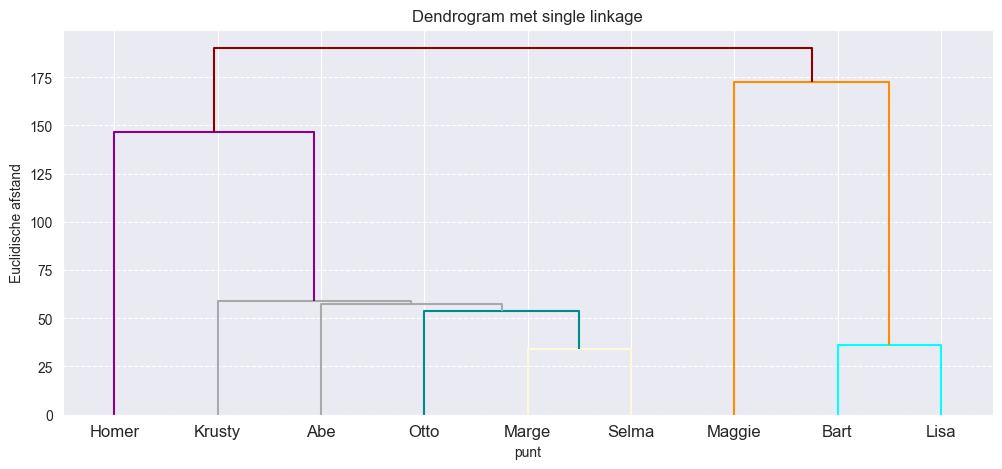

In [14]:
from matplotlib import pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist

afstanden_euclidische = pd.DataFrame(cdist(simpsons, simpsons), columns=simpsons.index, index=simpsons.index) # Afstanden Euclidische

colors = list(matplotlib.colors.cnames.keys())[0:100:2] # Kleuren voor de dendrogram

fig, ax = plt.subplots(figsize=(12, 5))
distances_single = linkage(afstanden_euclidische, method='single') # Single linkage (kleinste afstand eerst)
# distances_complete = linkage(afstanden_euclidische, method='complete') # Complete linkage (grootste afstand eerst)
_ = ax.set_title('Dendrogram met single linkage')
_ = ax.set_xlabel('punt')
_ = ax.set_ylabel('Euclidische afstand')
_ = ax.grid(linestyle='--', axis='y')

dgram = dendrogram(distances_single, labels=afstanden_euclidische.index.values, link_color_func=lambda x: colors[x], ax=ax)

7. Als je 2 clusters zou moeten selecteren uit deze boom, welke zijn dat dan? Hoe zou je die clusters benoemen?

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='manhattan', linkage='single')
cluster.fit(simpsons)
simpsons['cluster_with_2'] = cluster.labels_
display(simpsons)

,haarlengte,gewicht,leeftijd,cluster_with_2
naam,,,,
Homer,0,250,36,1
Marge,10,150,34,1
Bart,2,90,10,0
Lisa,6,78,8,0
Maggie,4,20,1,0
Abe,1,170,70,1
Selma,8,160,41,1
Otto,10,180,38,1
Krusty,6,200,45,1


8. Maak een scatterplot van de Simpsons waarbij je in de X-as leeftijd zet en in de Y-as het gewicht. Gebruik het clusternummer voor de kleur.


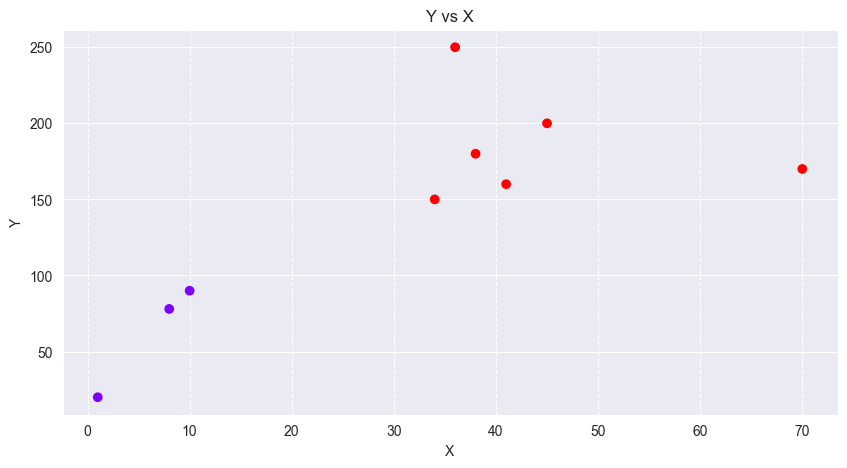

In [8]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(simpsons.leeftijd, simpsons.gewicht, c=simpsons.cluster_with_2, cmap='rainbow') # "c=simpsons.cluster_with_2, cmap='rainbow'" voor kleuren
ax.set_title('Y vs X')
ax.set_xlabel('X')
ax.set_ylabel('Y')
_=ax.grid(linestyle='--', axis='x')

9. Bepaal nu 3 clusters uit de boom en maak weer een plot. Welke Simpsons zitten nu in welke categorie?

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='single')
cluster.fit(simpsons)
simpsons['cluster_with_3'] = cluster.labels_
print(simpsons)

        haarlengte  gewicht  leeftijd  cluster_with_2  cluster_with_3
naam                                                                 
Homer            0      250        36               1               0
Marge           10      150        34               1               0
Bart             2       90        10               0               2
Lisa             6       78         8               0               2
Maggie           4       20         1               0               1
Abe              1      170        70               1               0
Selma            8      160        41               1               0
Otto            10      180        38               1               0
Krusty           6      200        45               1               0


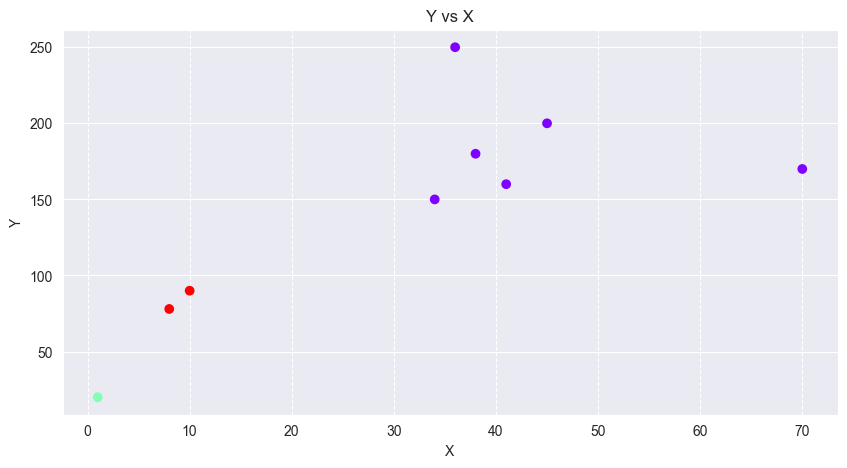

In [10]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(simpsons.leeftijd, simpsons.gewicht, c=simpsons.cluster_with_3, cmap='rainbow') # "c=simpsons.cluster_with_3, cmap='rainbow'" voor kleuren
ax.set_title('Y vs X')
ax.set_xlabel('X')
ax.set_ylabel('Y')
_=ax.grid(linestyle='--', axis='x')

10. Probeer nu 2 clusters te maken met het k-means algoritme. Kijk naar de centroids. In welke coördinaten verschillen deze centroids het meest?

,x,y,cluster
0,36,250,0
1,34,150,0
2,10,90,1
3,8,78,1
4,1,20,1
5,70,170,0
6,41,160,0
7,38,180,0
8,45,200,0


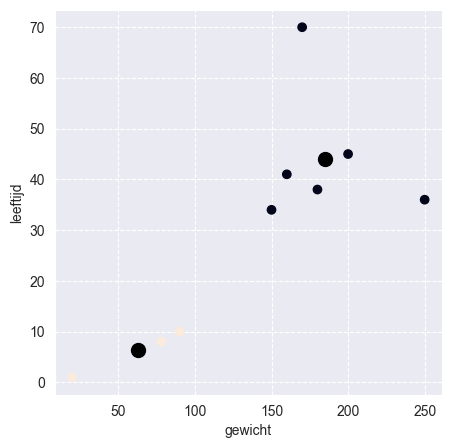

In [11]:
# K-means algoritme
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, n_init='auto', max_iter=100)
model.fit(simpsons)
model_simpsons_KMeans = pd.DataFrame(zip(simpsons.leeftijd, simpsons.gewicht, model.labels_), columns=["x", "y", "cluster"])
display(model_simpsons_KMeans)

# Berekenen en visualiseren van centroids
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(simpsons.gewicht, simpsons.leeftijd, c=model.labels_)
ax.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], c='black', s=100)
ax.set_xlabel("gewicht")
ax.set_ylabel("leeftijd")
ax.grid(linestyle='--')


11. Kan je een beslissingsboom opstellen die bepaalt in welke cluster een Simpson valt?
Maak hiertoe een kolom bij waarin het clusternummer staat en gebruik DecisionTreeClassifier om de boom op te stellen.

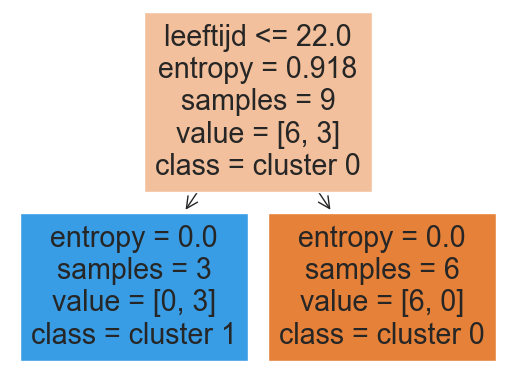

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, n_init='auto', max_iter=100)
model.fit(simpsons)

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['cluster_with_3', 'cluster_with_2'], axis=1), model.labels_)

_ = tree.plot_tree(classifier, feature_names=['haarlengte', 'gewicht', 'leeftijd'], class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)], filled=True)